# **Data Visualization - Maps**


---

## Functions
* `ggplot()`
* `tolower()`

<br>

---

Map packages

In [ ]:
install.packages("maps")
install.packages("mapproj")
#install.packages("ggmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(mapproj)
#library(ggmap)
library(maps)


<br>

Function to load census data

In [ ]:
 readCensus <- function() {
   urlToRead <-"http://www2.census.gov/programs-surveys/popest/tables/2010-2011/state/totals/nst-est2011-01.csv"
   
   #read the data from the web
   testFrame <- read.csv(url(urlToRead))
   
   #remove the first 8 rows (âheader informationâ)
   testFrame<-testFrame[-1:-8,]
   
   #only keep the first 5 columns
   testFrame<-testFrame[,1:5]
   
   #rename the first column
   testFrame$stateName <- testFrame[,1]
   testFrame<-testFrame[,-1]
   
   #remove the last rows (tail info)
   testFrame<-testFrame[-52:-58,]
   
   #remove the âdotâ from the state name
   testFrame$stateName <- gsub("\\.","", testFrame$stateName)
   
   #convert the columns to actual numbers and rename columns
   testFrame$april10census <-Numberize(testFrame$X)
   testFrame$april10base <-Numberize(testFrame$X.1)
   testFrame$july10pop <-Numberize(testFrame$X.2)
   testFrame$july11pop <-Numberize(testFrame$X.3)
   testFrame <- testFrame[,-1:-4]
   
   #remove the old rownames, which are now confusing
   rownames(testFrame) <- NULL
   
   return(testFrame)
 }
 
 Numberize <- function(inputVector)
 {
   # Get rid of commas
   inputVector<-gsub(",","", inputVector)
   # Get rid of spaces
   inputVector<-gsub(" ","", inputVector)
   
   return(as.numeric(inputVector))
 }

<br>

Load map data to draw map

In [ ]:
us <- map_data("state")
head(us)
nrow(us)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


[1] 15537

<br>

The map function for ggplot only takes the names of states in lower case

In [ ]:
# convert to lower case
dummyDF <- data.frame(state.name, stringsAsFactors=FALSE)
dummyDF$state <- tolower(dummyDF$state.name)
head(dummyDF)

,state.name,state
,<chr>,<chr>
1,Alabama,alabama
2,Alaska,alaska
3,Arizona,arizona
4,Arkansas,arkansas
5,California,california
6,Colorado,colorado


<br>

Create a basic map of the United States

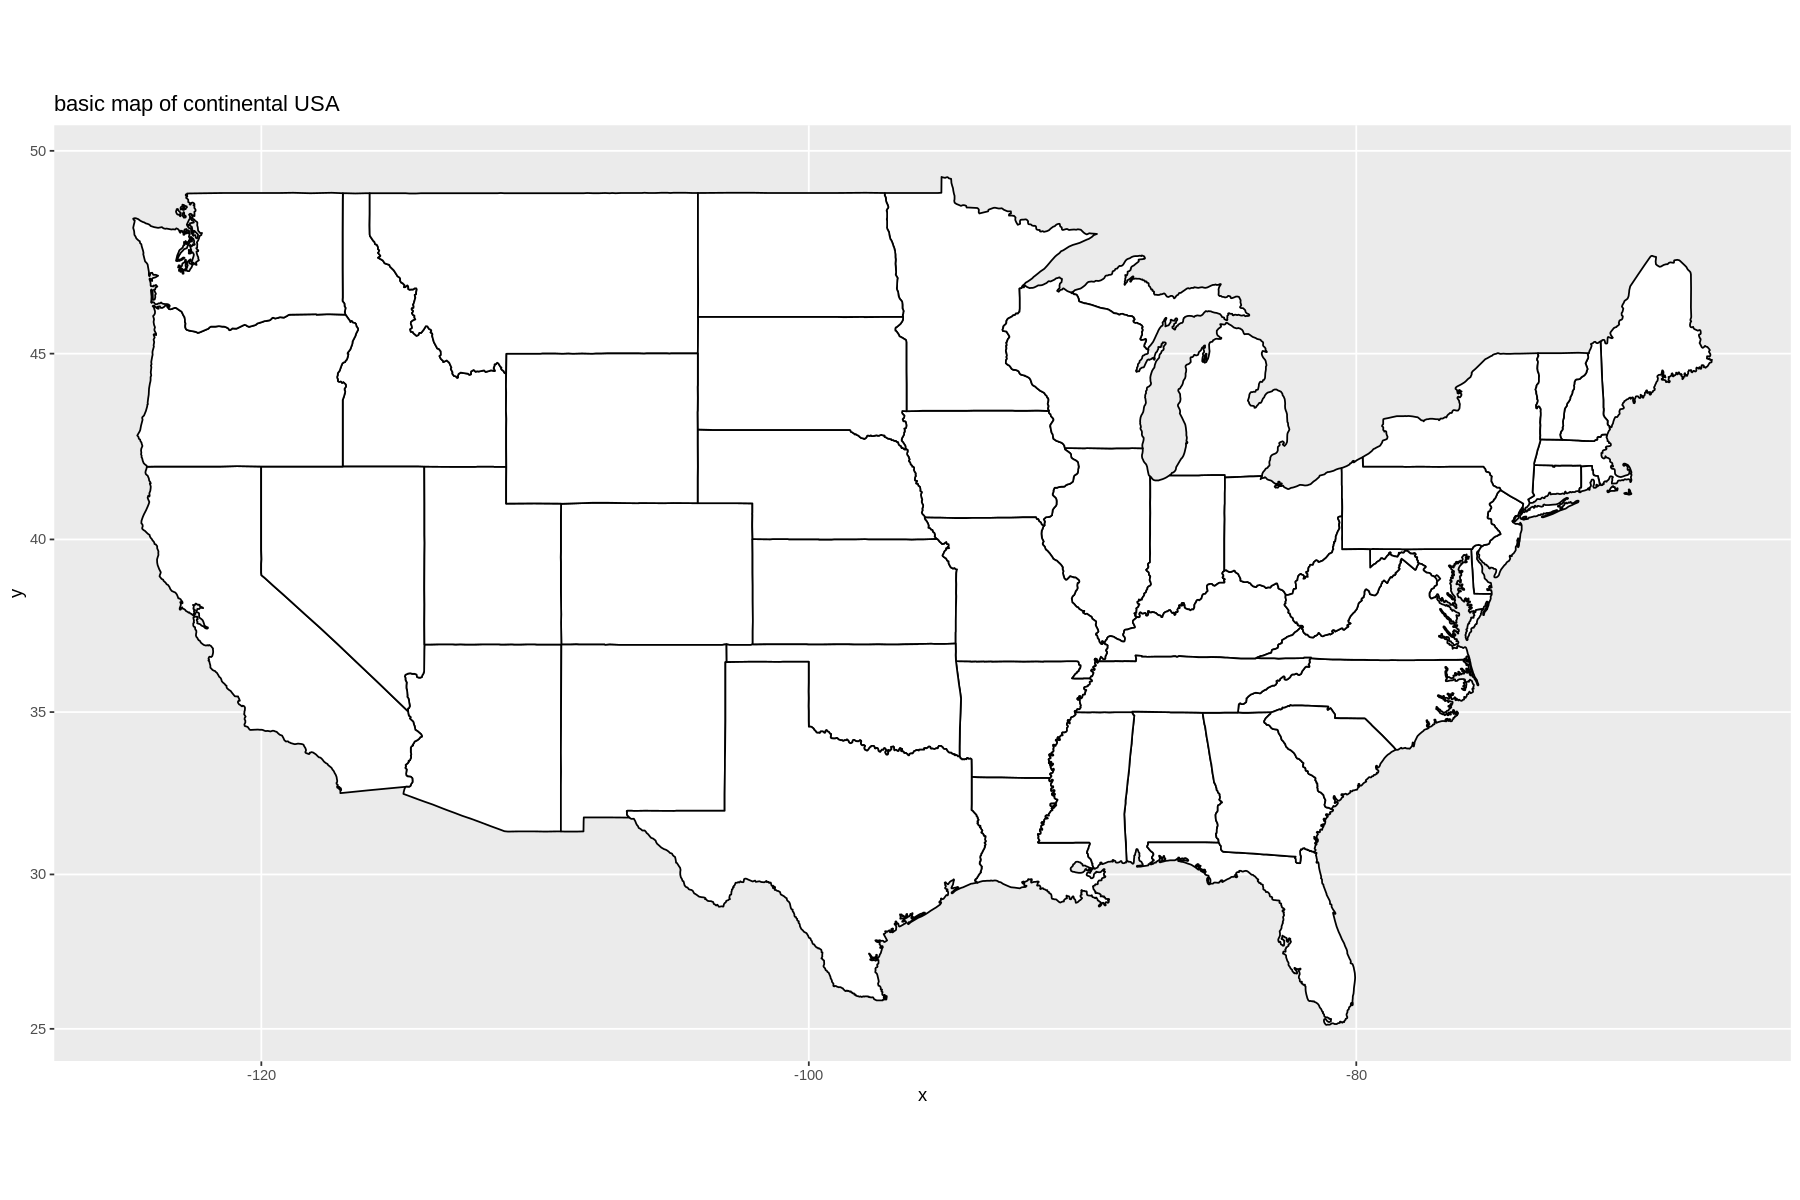

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
map.simple <- ggplot(dummyDF, aes(map_id = state)) +
                     geom_map(map = us, fill="white", color="black") +
                     expand_limits(x = us$long, y = us$lat) + # coordinates for state borders
                     coord_map("mercator") + 
                     ggtitle("basic map of continental USA")
map.simple

<br>

Load Census data

In [ ]:
dfStates <- readCensus()

# convert to lowercase
dfStates$state <- tolower(dfStates$stateName)  

# remove DC
dfStates <- dfStates[ dfStates$state != "district of columbia", ]
dfStates <- data.frame(dfStates, state.abb)

head(dfStates)

,stateName,april10census,april10base,july10pop,july11pop,state,state.abb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Alabama,4779736,4779735,4785401,4802740,alabama,AL
2,Alaska,710231,710231,714146,722718,alaska,AK
3,Arizona,6392017,6392013,6413158,6482505,arizona,AZ
4,Arkansas,2915918,2915921,2921588,2937979,arkansas,AR
5,California,37253956,37253956,37338198,37691912,california,CA
6,Colorado,5029196,5029196,5047692,5116796,colorado,CO


<br>

Color states by July 2011 population

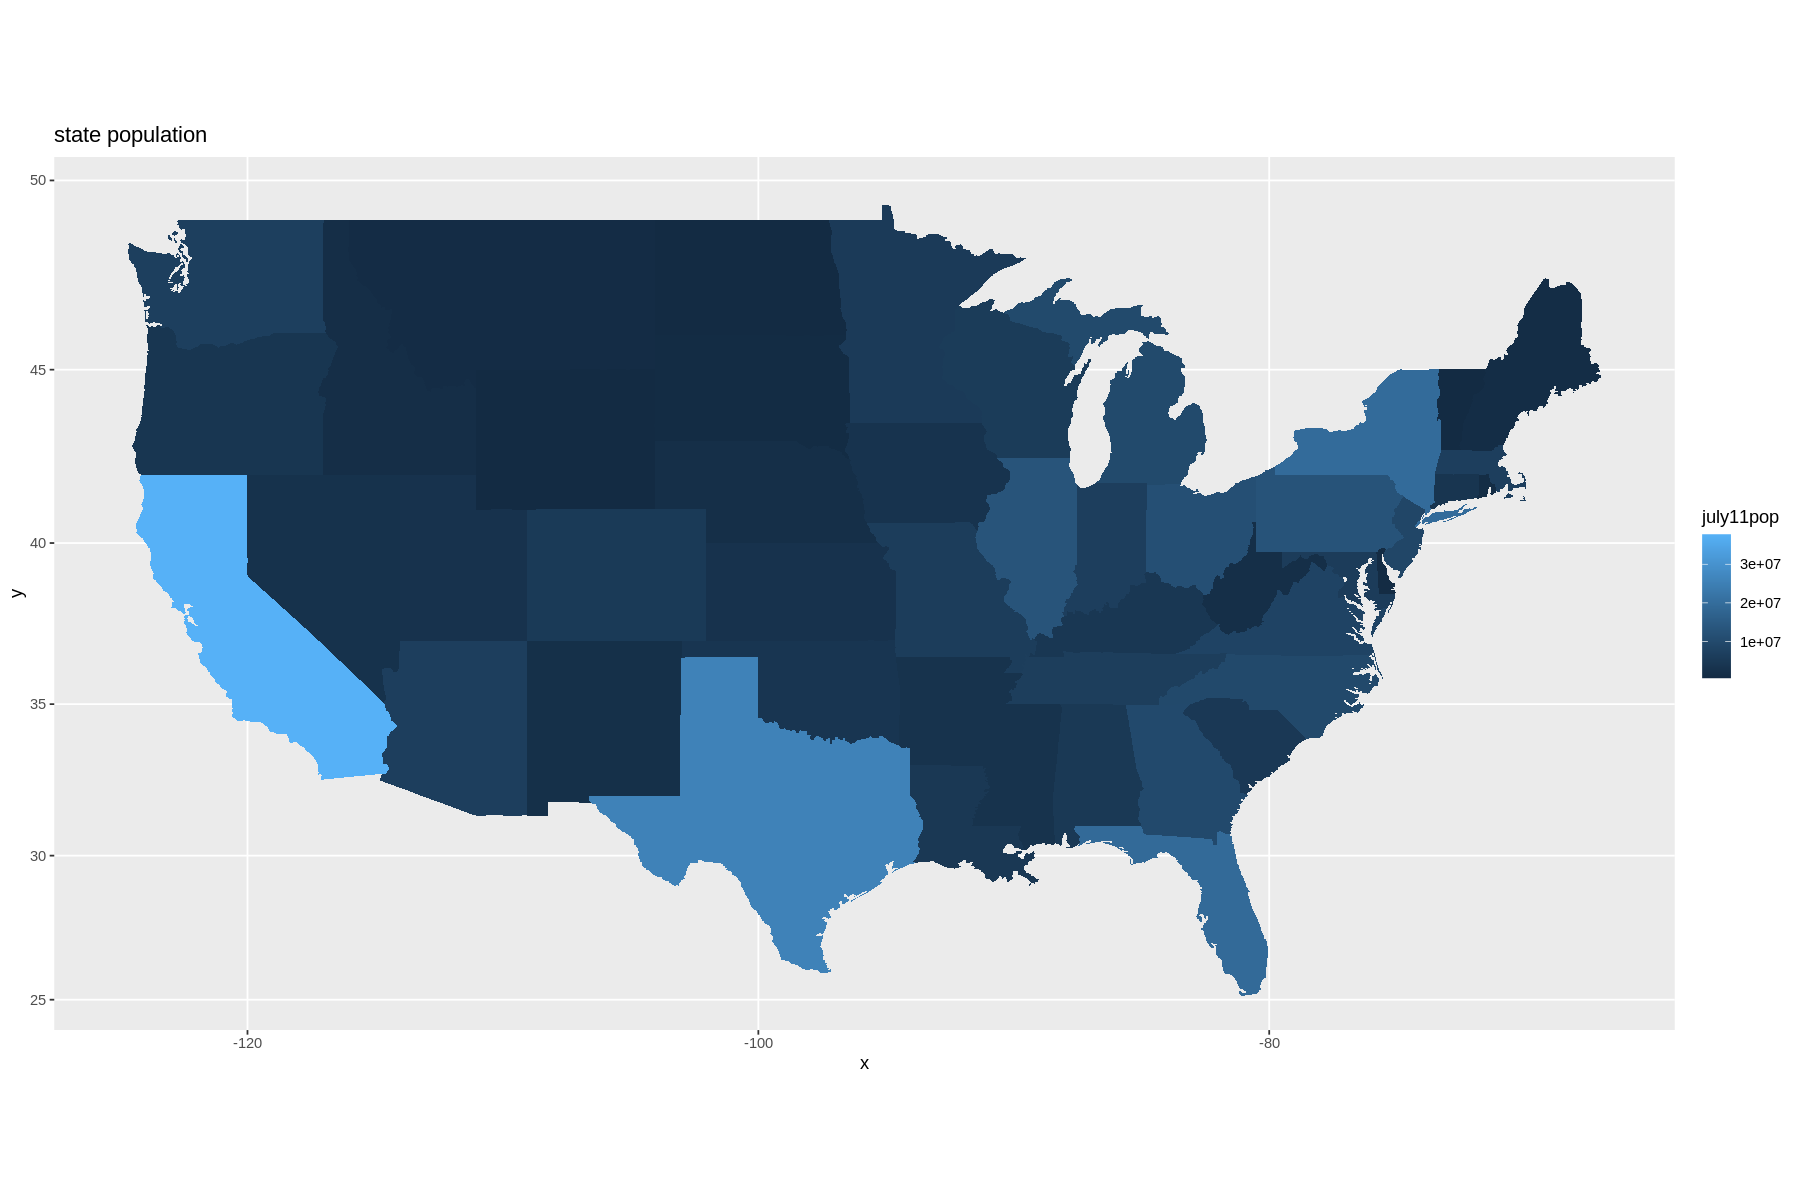

In [ ]:
map.color <- ggplot(dfStates, aes(map_id = state)) + 
                    geom_map(map = us, aes(fill=july11pop)) + 
                    expand_limits(x = us$long, y = us$lat) + 
                    coord_map() + ggtitle("state population")
map.color

<br>

Adding data points to the map

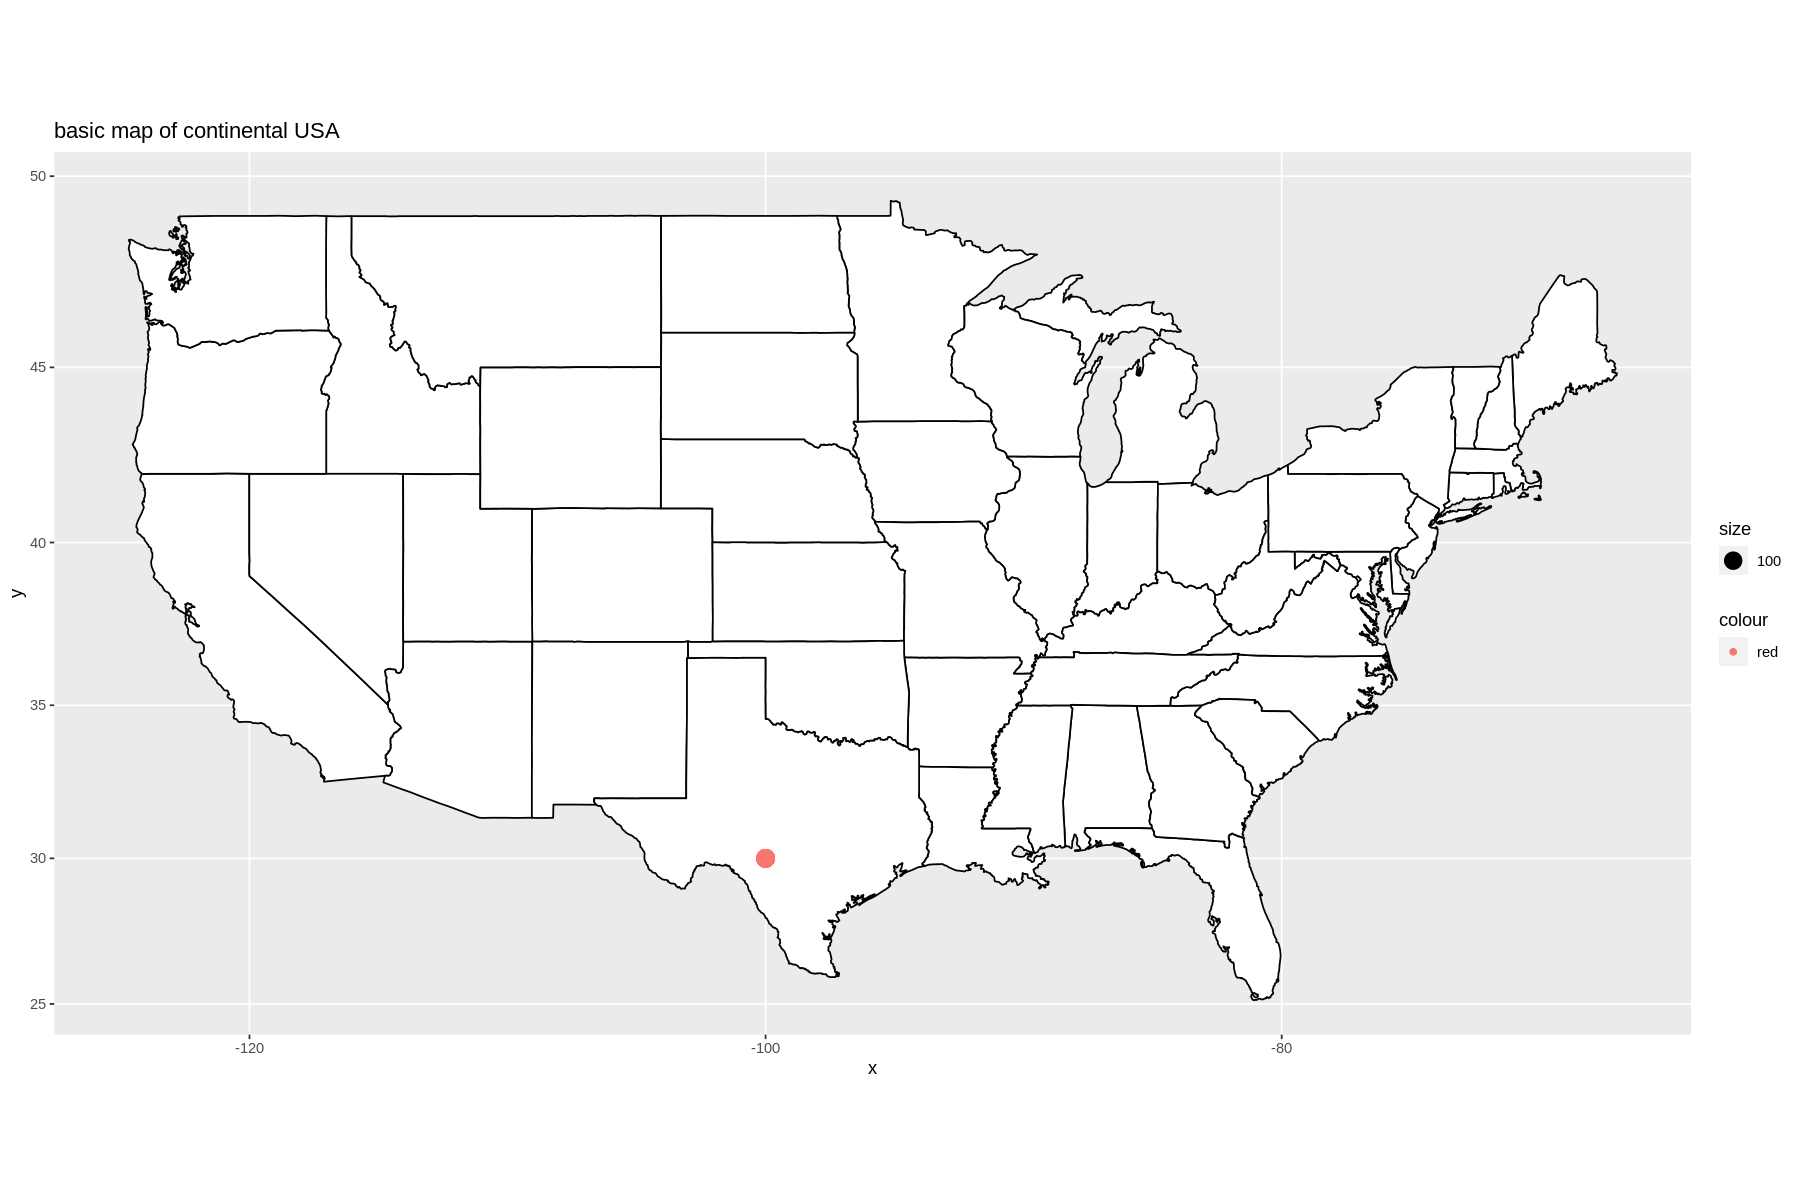

In [ ]:
 map.simple + geom_point(aes(x = -100, y = 30, size=100, color="red"))

<br>

Let's add real data

In [ ]:
# Data on police killings 
urlFile <- "https://raw.githubusercontent.com/khasenst/datasets_teaching/main/police_killings.csv"
police.killings <- read.csv(url(urlFile))
head(police.killings)

# focus on mainland US
police.killings <- police.killings[ !police.killings$state %in% c('AK', 'HI'), ]

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


In [ ]:
names(police.killings)

[1] "name"                 "age"                  "gender"              
 [4] "raceethnicity"        "month"                "day"                 
 [7] "year"                 "streetaddress"        "city"                
[10] "state"                "latitude"             "longitude"           
[13] "state_fp"             "county_fp"            "tract_ce"            
[16] "geo_id"               "county_id"            "namelsad"            
[19] "lawenforcementagency" "cause"                "armed"               
[22] "pop"                  "share_white"          "share_black"         
[25] "share_hispanic"       "p_income"             "h_income"            
[28] "county_income"        "comp_income"          "county_bucket"       
[31] "nat_bucket"           "pov"                  "urate"               
[34] "college"

<br>



```
# This is formatted as code
```

Locations of police killings

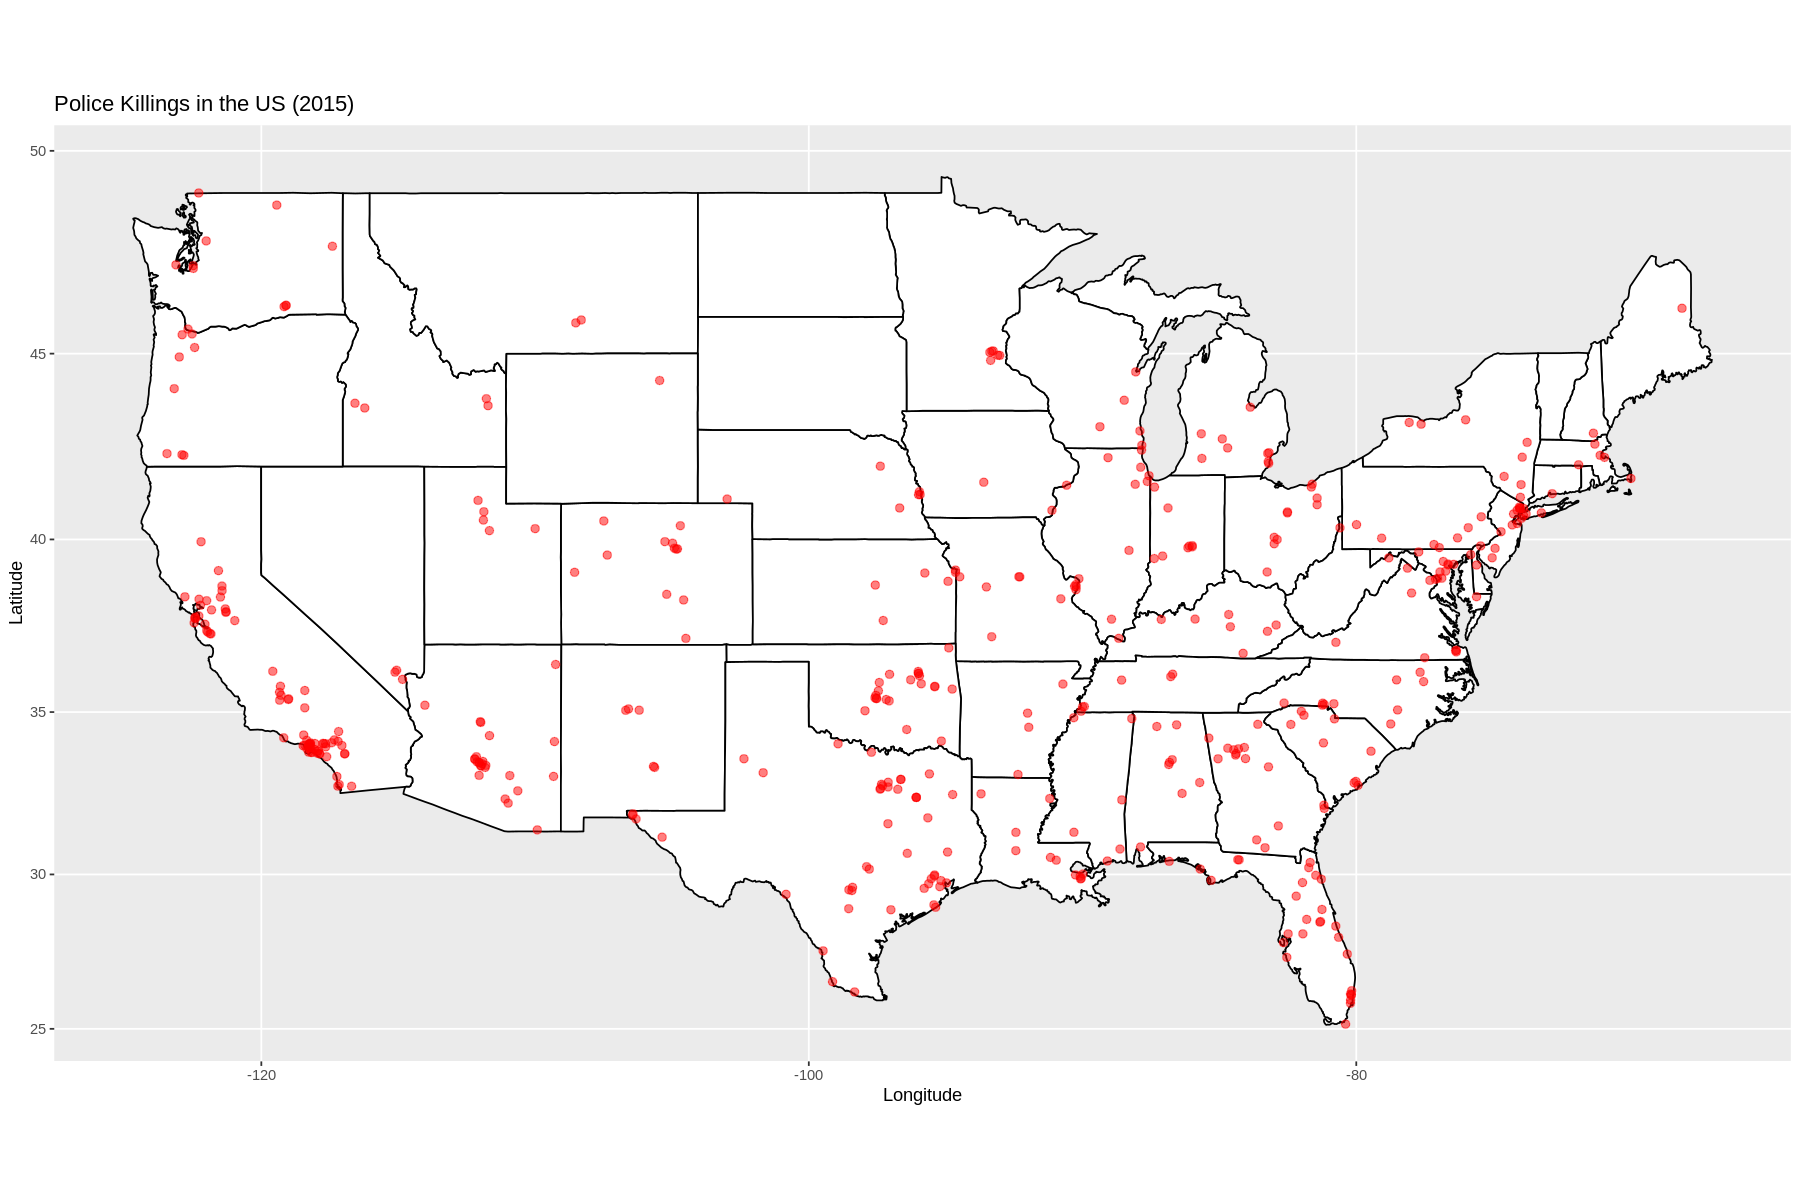

In [ ]:
map.simple <- ggplot(dummyDF, aes(map_id = state)) +
                     geom_map(map = us, fill="white", color="black") +
                     expand_limits(x = us$long, y = us$lat) + # coordinates for state borders
                     coord_map() + 
                     ggtitle("Police Killings in the US (2015)") +
                     xlab("Longitude") + ylab("Latitude") +
                     
                     geom_point(data=police.killings,aes(x = longitude, y = latitude),  
                                alpha = .5, size = 2, color = "red")
map.simple

<br>

Putting it all together

In [ ]:
# calculate the total number of deaths per state
killings <- tapply(police.killings$state, police.killings$state, length)
killings <- data.frame(state.abb = names(killings), killings)
killings2 <- merge(dfStates, killings, by = "state.abb", all.x = TRUE)
killings2$killings[is.na(killings2$killings)] <- 0

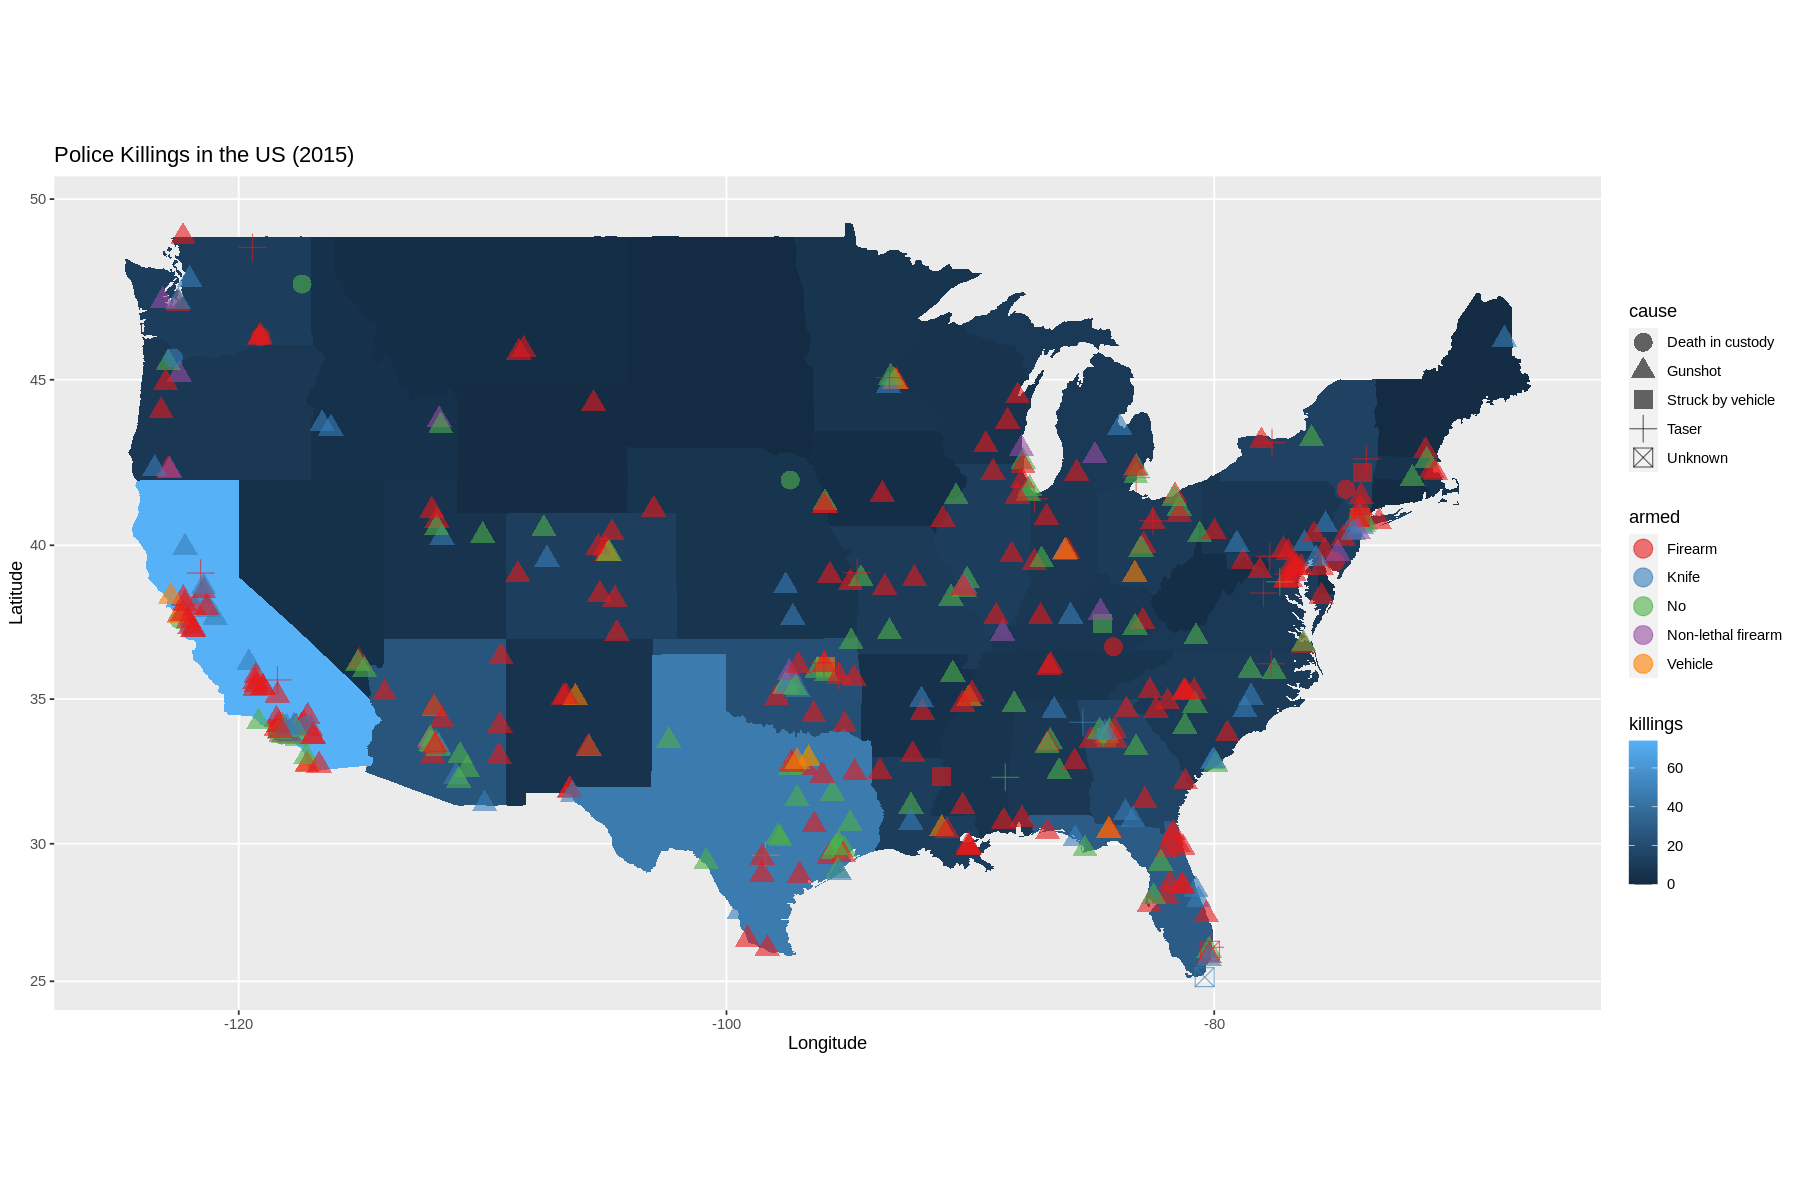

In [ ]:
police.killings <- subset(police.killings, armed %in% c('No','Firearm','Non-lethal firearm','Knife','Vehicle'))

map.color <- ggplot(killings2, aes(map_id = state)) + 
                    geom_map(map = us, aes(fill=killings)) + 
                    expand_limits(x = us$long, y = us$lat) + 
                    coord_map() +

                     ggtitle("Police Killings in the US (2015)") +
                     xlab("Longitude") + ylab("Latitude") + 
                     
                     geom_point(data = police.killings, 
                                aes(x = longitude, y = latitude, color = armed, shape=cause), alpha = .6, size = 5) +
                     scale_color_brewer(palette="Set1")
map.color

<br>